# MCMC, Gibbs Sampler, MH

### Thanoj Muddana


### Exercise 1

**Explain in Video**

Look at Rizzo Example 9.7 (first edition) or 11.10 (second edition) about generating a bivariate normal distribution with correlation -0.75.

We can instead use the ***random scan*** Gibbs sampler, but there is a question about how the random scan affects the burn in period since we are no longer sampling from both coordinates for each step.

a) Try to implement the random scan Gibbs sampler using the same number of burn-ins and saved runs as in the example, and plot the resulting sample.

**hint:** Your plot should look like the one in this link:
https://docs.google.com/document/d/1TgS0zYPy0N0gK0JqVDv6rR9KEvXHbDNZi0-jSs2C2RM/edit?usp=sharing

b) Then experiment with the random scan using different burn-ins but (10*burn-in) for the number of saved runs. What is the size of the burn-in that you need to get a plot similar to what you get for the deterministic scan?


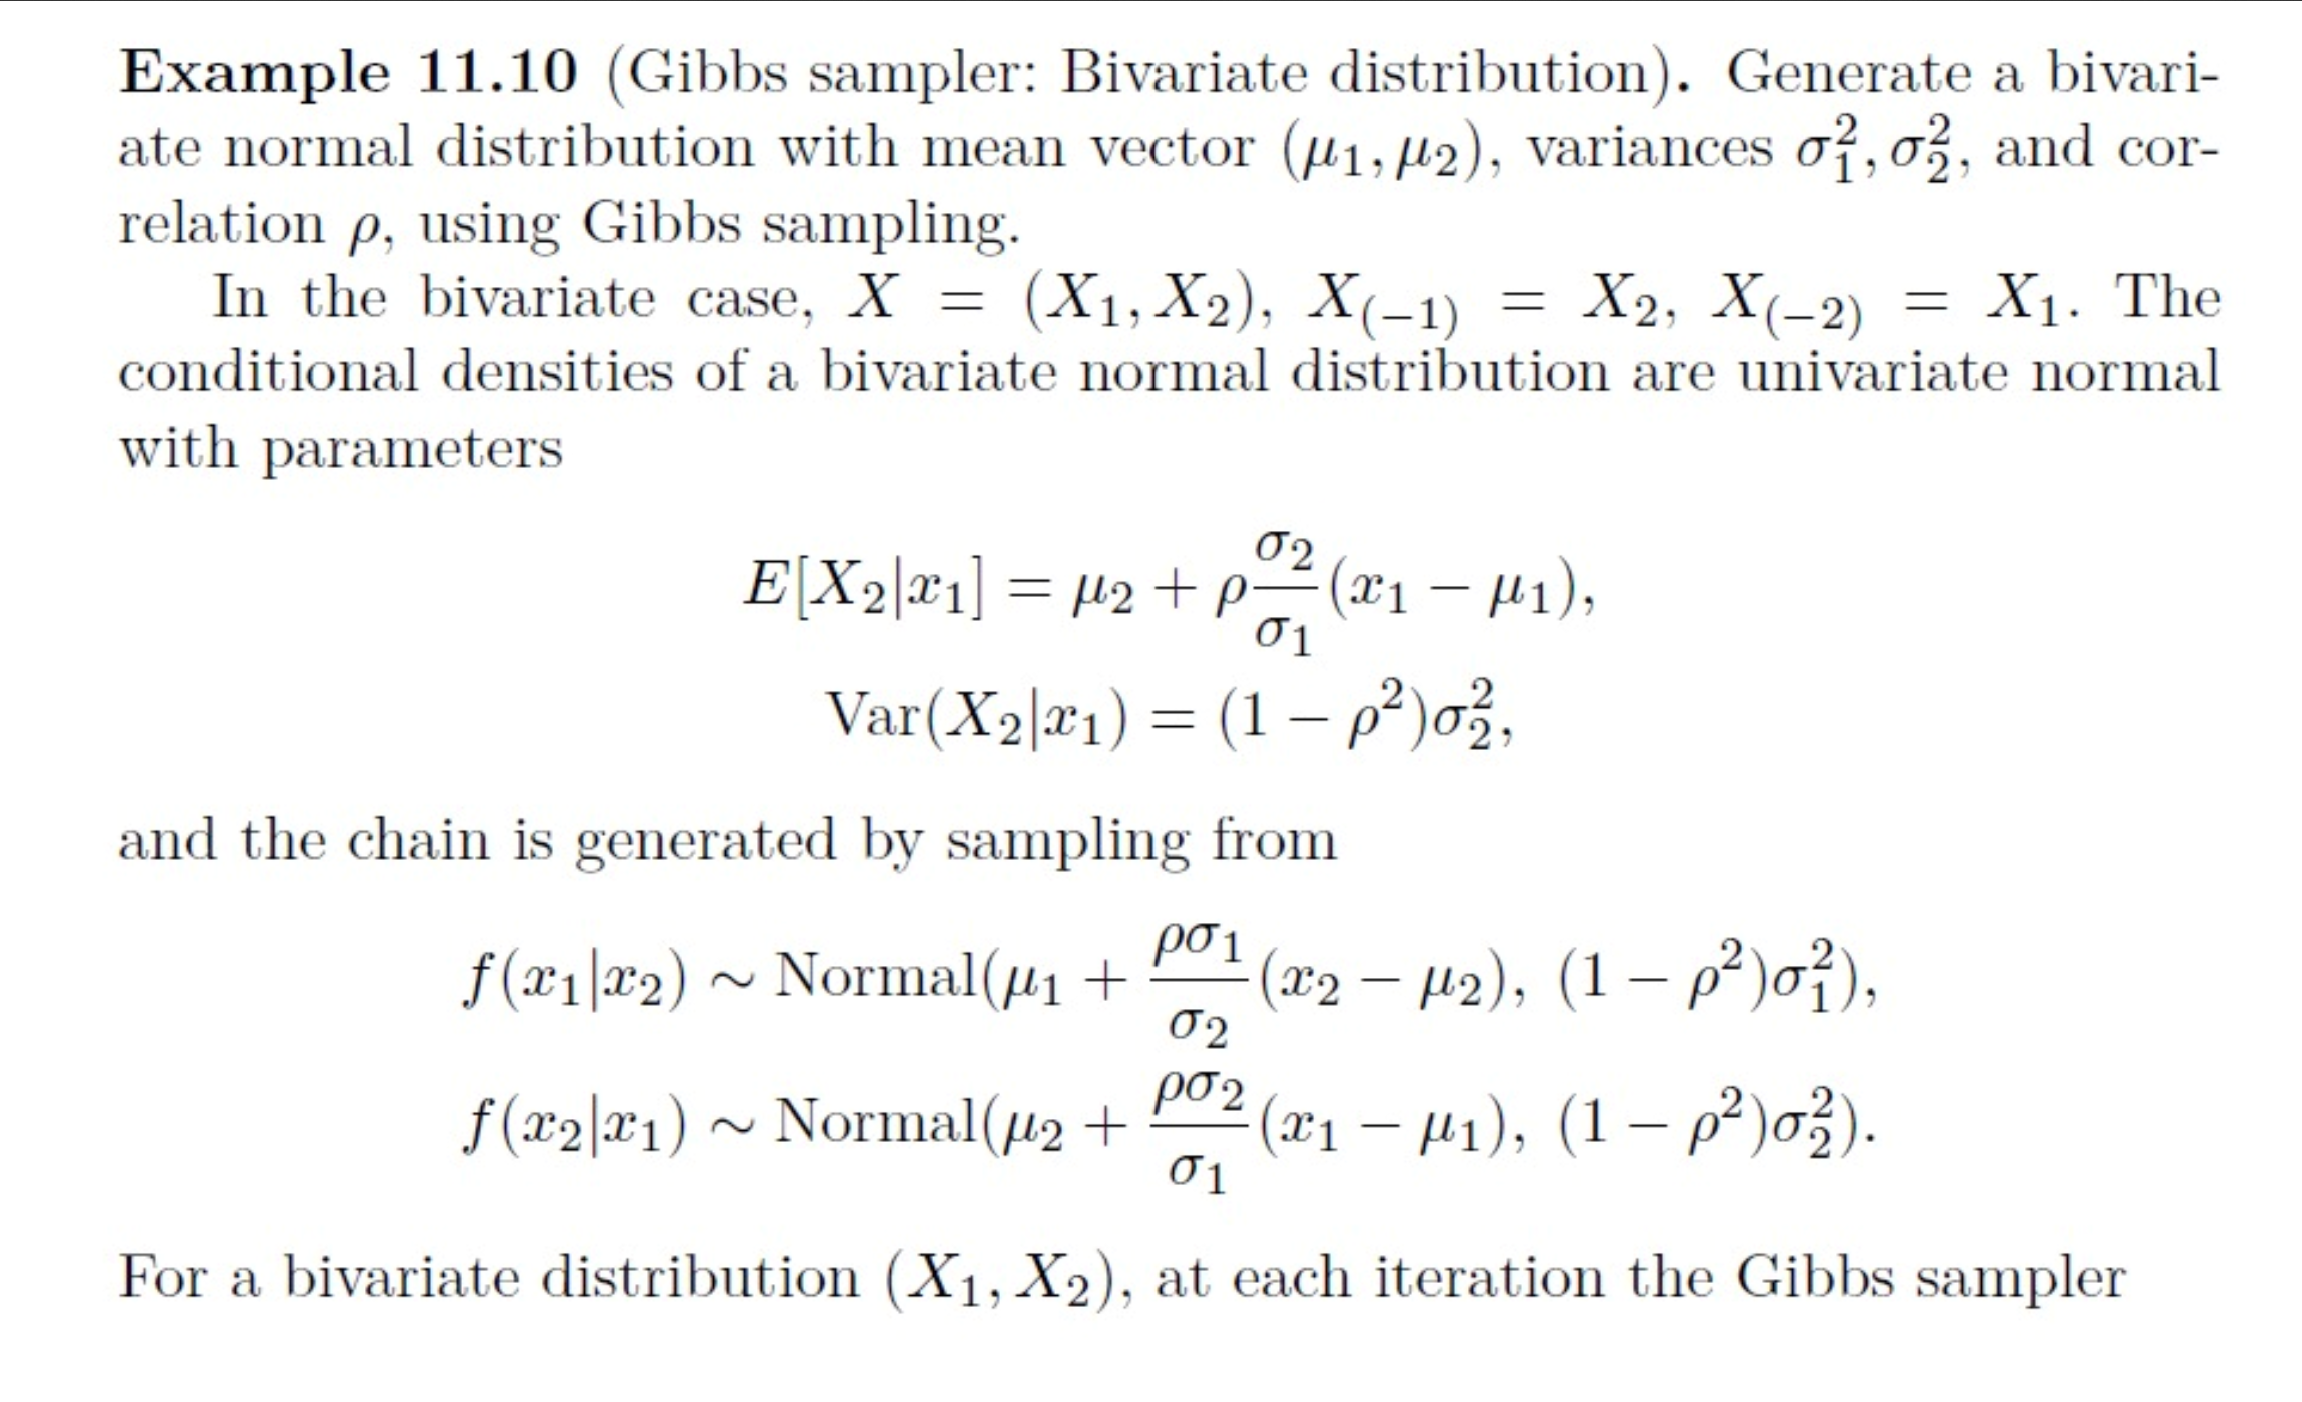

Random Scan Gibbs Sampling

Sample Means:
Mean(X1) = 0.07286317 
Mean(X2) = 1.964899 

Sample Correlation:
Corr(X1, X2) = -0.7420998 


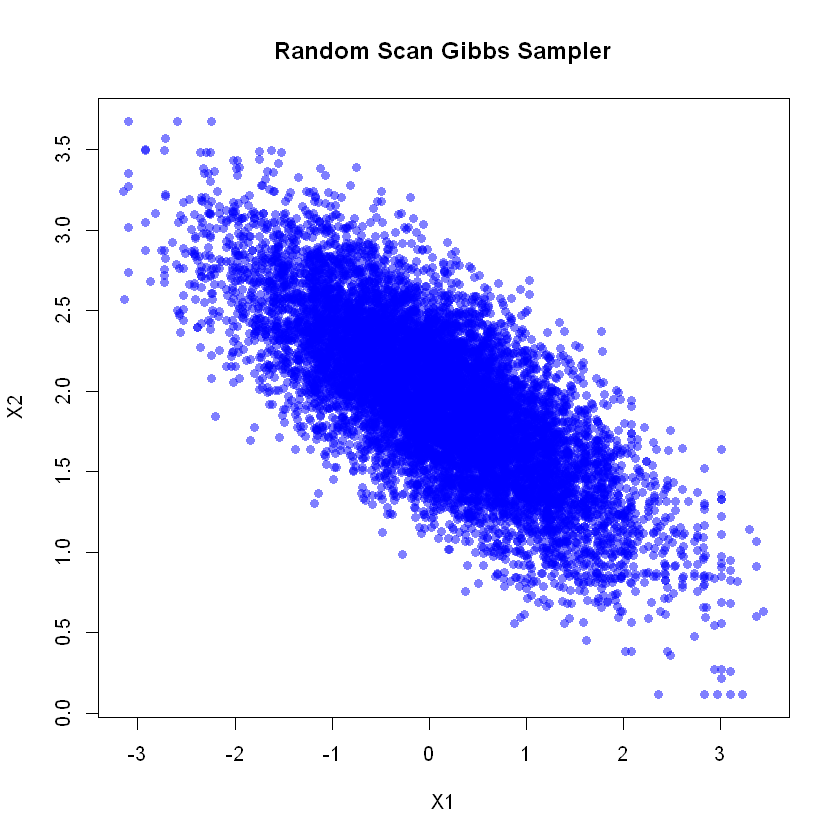

In [1]:
set.seed(1)

# Parameters for the bivariate normal distribution
rho <- -0.75 # Correlation coefficient
mu1 <- 0     # Mean of X1
mu2 <- 2     # Mean of X2
sigma1 <- 1  # Standard deviation of X1
sigma2 <- 0.5  # Standard deviation of X2
s1= sqrt((1 - rho^2) * sigma1^2)
s2=sqrt((1 - rho^2) * sigma2^2)
# Number of iterations
burn_in <- 1000
runs <- 10*burn_in

# Initialize storage for samples
samples <- matrix(NA, nrow = runs, ncol = 2)
colnames(samples) <- c("X1", "X2")

# Random scan Gibbs sampling function
random_scan_gibbs <- function(x1, x2) {
  # Randomly decide which variable to update
  if (runif(1) < 0.5) {
    # Update X1 given X2
    cond_mean_x1 <- mu1 + rho * sigma1 / sigma2 * (x2 - mu2)
    x1 <- rnorm(1, mean = cond_mean_x1, sd = s1)
  } else {
    # Update X2 given X1
    cond_mean_x2 <- mu2 + rho * sigma2 / sigma1 * (x1 - mu1)
    x2 <- rnorm(1, mean = cond_mean_x2, sd = s2)
  }
  # Return the updated state
  return(c(x1, x2))
}

# Initialize MC starting values
x1 <- rnorm(1, mean = mu1, sd = sigma1)
x2 <- rnorm(1, mean = mu2, sd = sigma2)

# Burn-in period
for (b in 1:burn_in) {
  x_vector <- random_scan_gibbs(x1, x2)
  x1 <- x_vector[1]
  x2 <- x_vector[2]
}

# Simulations
for (r in 1:runs) {
  x_vector <- random_scan_gibbs(x1, x2)
  x1 <- x_vector[1]
  x2 <- x_vector[2]
  samples[r, ] <- x_vector
}

# Plot the resulting sample
plot(samples[, 1], samples[, 2],
     main = "Random Scan Gibbs Sampler",
     xlab = "X1", ylab = "X2", pch = 16, col = rgb(0, 0, 1, 0.5))

# Calculate and display sample statistics
cat("Sample Means:\n")
cat("Mean(X1) =", mean(samples[, 1]), "\n")
cat("Mean(X2) =", mean(samples[, 2]), "\n")
cat("\nSample Correlation:\n")
cat("Corr(X1, X2) =", cor(samples[, 1], samples[, 2]), "\n")


Deterministic Gibbs Sampling

Sample Means:
Mean(X1) = -0.01812763 
Mean(X2) = 2.00915 

Sample Correlation:
Corr(X1, X2) = -0.749674 


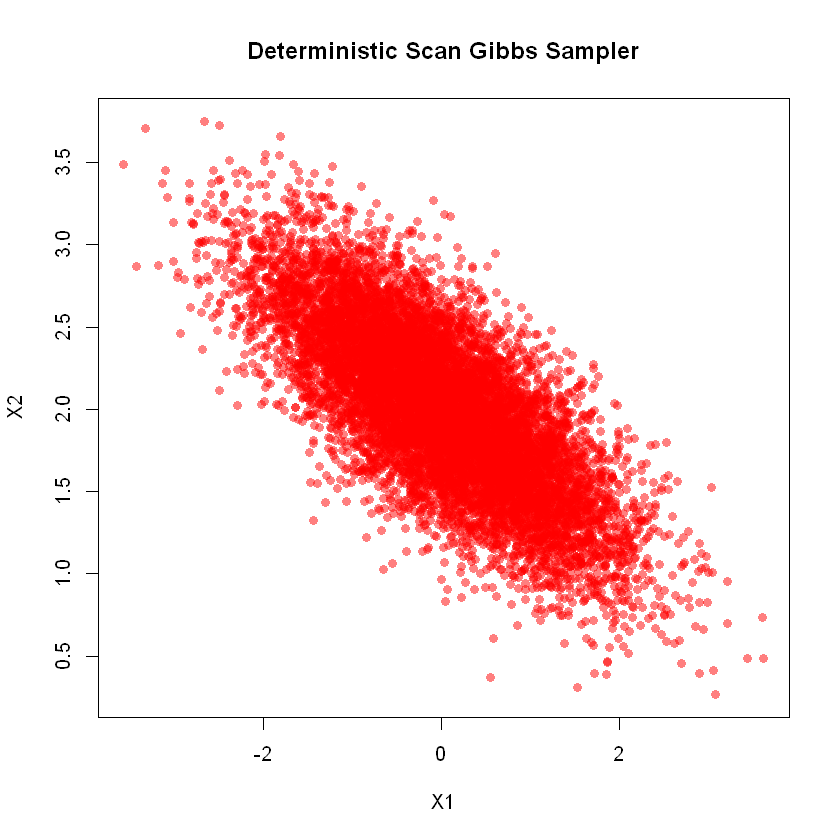

In [2]:
#deterministic Scan
set.seed(1)


# Initialize storage for samples
deterministic_scan_samples <- matrix(NA, nrow = runs, ncol = 2)
colnames(deterministic_scan_samples) <- c("X1", "X2")

# Deterministic scan Gibbs sampling function
deterministic_scan_gibbs <- function(x1, x2) {
  # Update X1 given X2
  cond_mean_x1 <- mu1 + rho * sigma1 / sigma2 * (x2 - mu2)
  x1 <- rnorm(1, mean = cond_mean_x1, sd = s1)

  # Update X2 given X1
  cond_mean_x2 <- mu2 + rho * sigma2 / sigma1 * (x1 - mu1)
  cond_sd_x2 <- sqrt((1 - rho^2) * sigma2^2)
  x2 <- rnorm(1, mean = cond_mean_x2, sd = s2)

  return(c(x1, x2))
}

# Initialize MC starting values
x1 <- rnorm(1, mean = mu1, sd = sigma1)
x2 <- rnorm(1, mean = mu2, sd = sigma2)

# Burn-in period
for (b in 1:burn_in) {
  x_vector <- deterministic_scan_gibbs(x1, x2)
  x1 <- x_vector[1]
  x2 <- x_vector[2]
}

# Simulations
for (r in 1:runs) {
  x_vector <- deterministic_scan_gibbs(x1, x2)
  x1 <- x_vector[1]
  x2 <- x_vector[2]
  deterministic_scan_samples[r, ] <- x_vector
}

# Plot the resulting sample
plot(deterministic_scan_samples[, 1], deterministic_scan_samples[, 2],
     main = "Deterministic Scan Gibbs Sampler",
     xlab = "X1", ylab = "X2", pch = 16, col = rgb(1, 0, 0, 0.5))

# Calculate and display sample statistics
cat("Sample Means:\n")
cat("Mean(X1) =", mean(deterministic_scan_samples[, 1]), "\n")
cat("Mean(X2) =", mean(deterministic_scan_samples[, 2]), "\n")
cat("\nSample Correlation:\n")
cat("Corr(X1, X2) =", cor(deterministic_scan_samples[, 1], deterministic_scan_samples[, 2]), "\n")


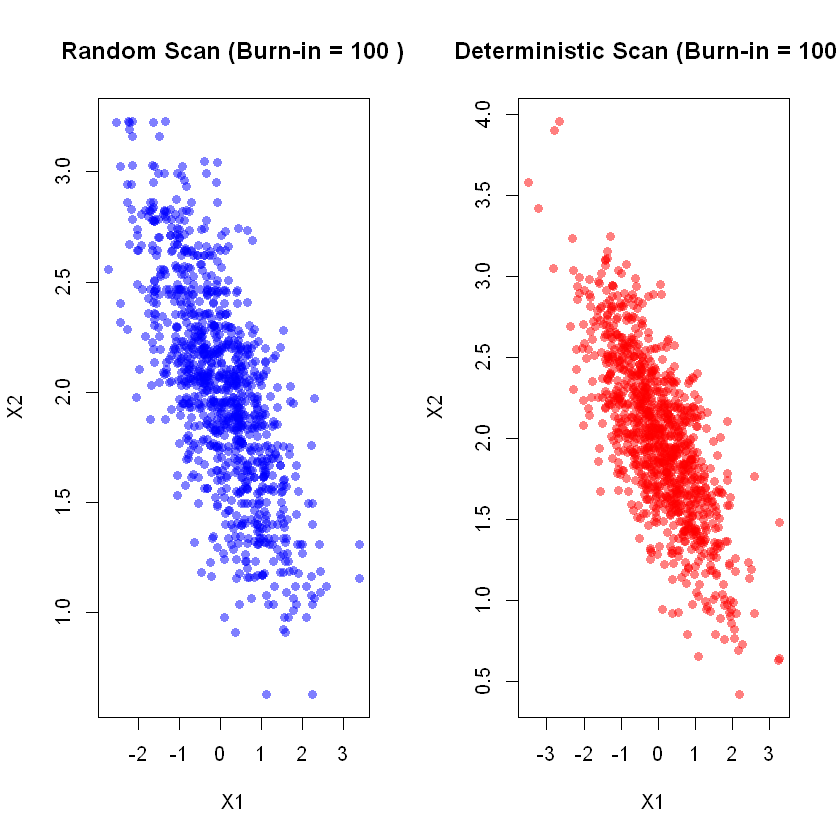

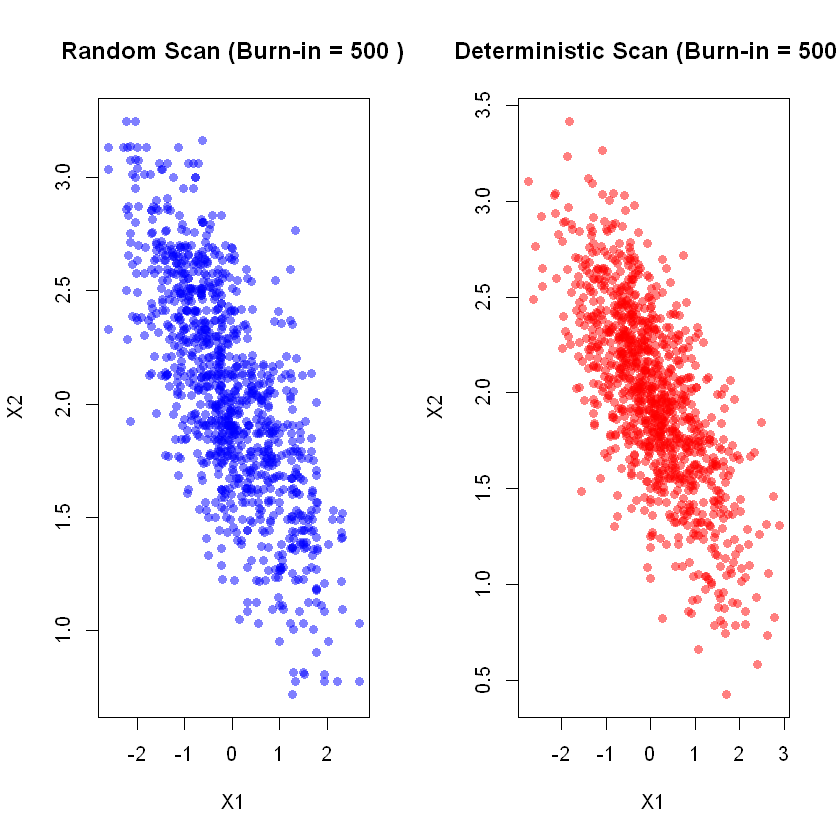

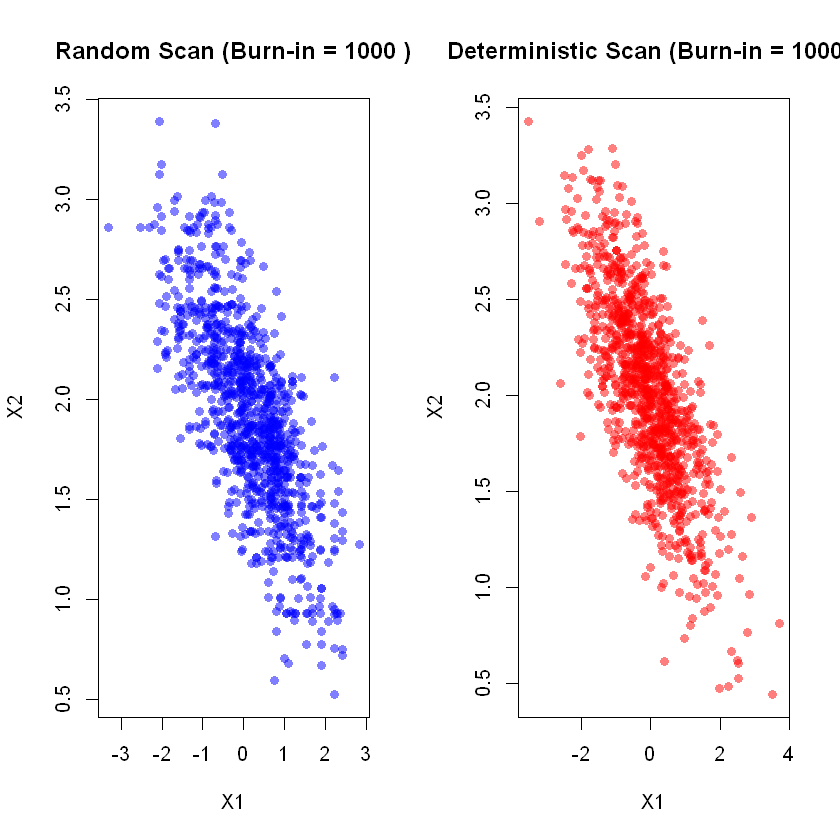

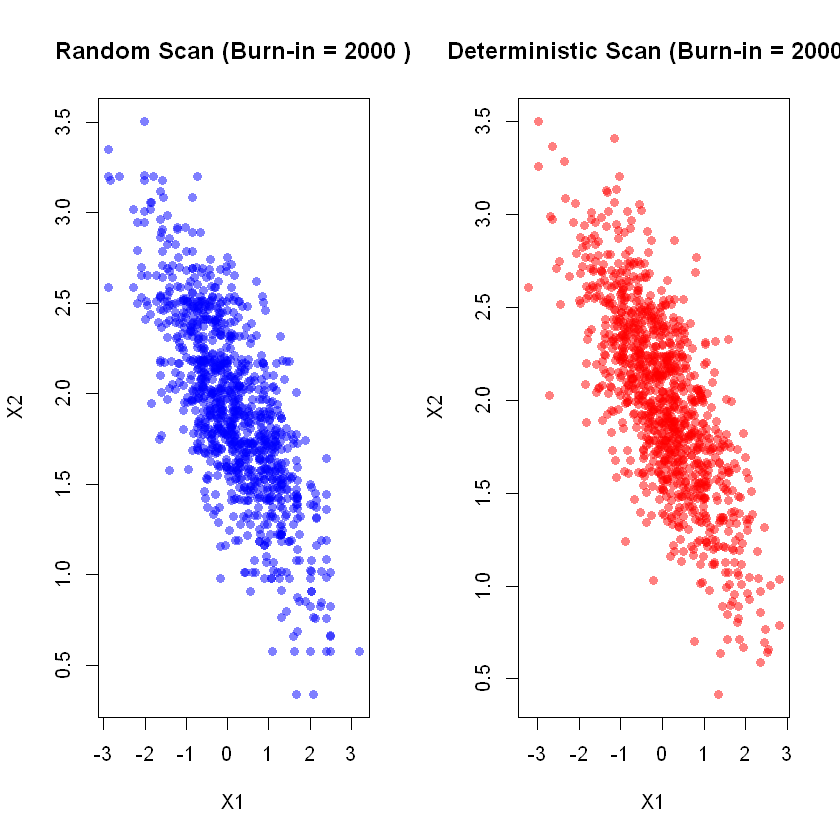

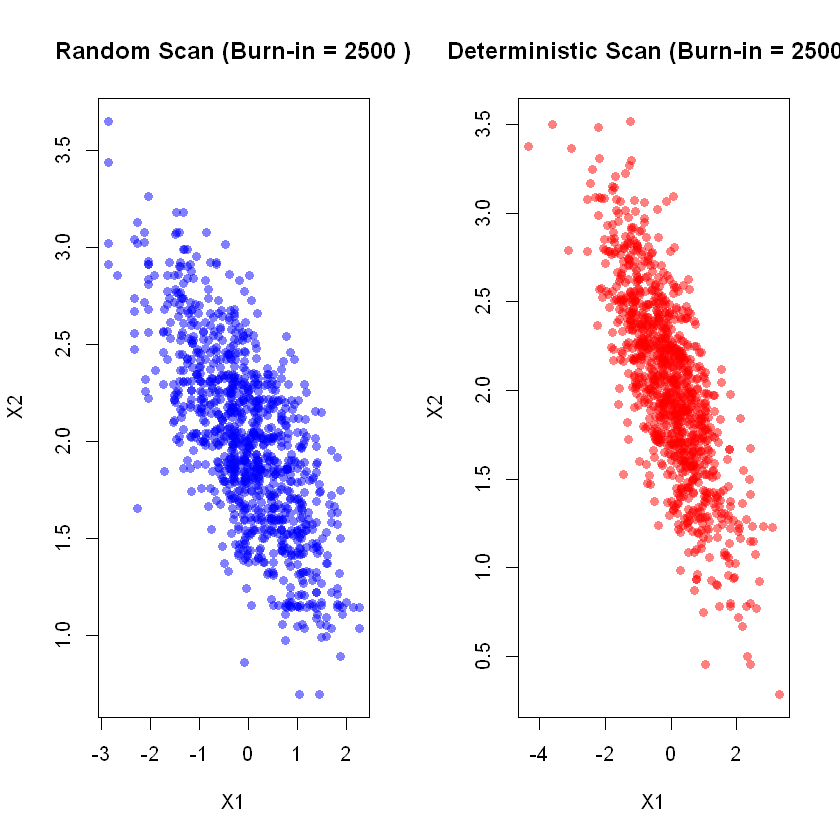

In [3]:
options(warn = -1) # Ignore warnings

# Comparison for different burn-in periods
compare_samplers <- function(burn_in_values, runs, random_func, deterministic_func) {
  for (burn_in in burn_in_values) {
    # Random Scan Gibbs Sampling
    samples_random <- matrix(NA, nrow = runs, ncol = 2)
    colnames(samples_random) <- c("X1", "X2")
    x1 <- rnorm(1, mean = mu1, sd = sigma1)
    x2 <- rnorm(1, mean = mu2, sd = sigma2)

    for (b in 1:burn_in) {
      x_vector <- random_func(x1, x2)
      x1 <- x_vector[1]
      x2 <- x_vector[2]
    }

    for (r in 1:runs) {
      x_vector <- random_func(x1, x2)
      samples_random[r, ] <- x_vector
      x1 <- x_vector[1]
      x2 <- x_vector[2]
    }

    # Deterministic Scan Gibbs Sampling
    samples_deterministic <- matrix(NA, nrow = runs, ncol = 2)
    colnames(samples_deterministic) <- c("X1", "X2")
    x1 <- rnorm(1, mean = mu1, sd = sigma1)
    x2 <- rnorm(1, mean = mu2, sd = sigma2)

    for (b in 1:burn_in) {
      x_vector <- deterministic_func(x1, x2)
      x1 <- x_vector[1]
      x2 <- x_vector[2]
    }

    for (r in 1:runs) {
      x_vector <- deterministic_func(x1, x2)
      samples_deterministic[r, ] <- x_vector
      x1 <- x_vector[1]
      x2 <- x_vector[2]
    }

    # Plot Random Scan and Deterministic Scan together
    par(mfrow = c(1, 2))

    # Plot Random Scan
    plot(samples_random[, 1], samples_random[, 2],
         main = paste("Random Scan (Burn-in =", burn_in, ")"),
         xlab = "X1", ylab = "X2", pch = 16, col = rgb(0, 0, 1, 0.5))

    # Plot Deterministic Scan
    plot(samples_deterministic[, 1], samples_deterministic[, 2],
         main = paste("Deterministic Scan (Burn-in =", burn_in, ")"),
         xlab = "X1", ylab = "X2", pch = 16, col = rgb(1, 0, 0, 0.5))

    par(mfrow = c(1, 1))
  }
}

# Settings
burn_in_values <- c(100, 500, 1000, 2000, 2500)
runs <- 10 * burn_in_values

# Compare random scan and deterministic scan Gibbs samplers
compare_samplers(burn_in_values, runs, random_scan_gibbs, deterministic_scan_gibbs)


### Exercise 2

**Explain in Video**

Verify that Gibbs sampling satisfies detailed balance in the sense that sampling from each component conditional on the other components satisfies detailed balance. Without loss of generality, you can assume that we're using the deterministic Gibbs sampler. Please show all your work!

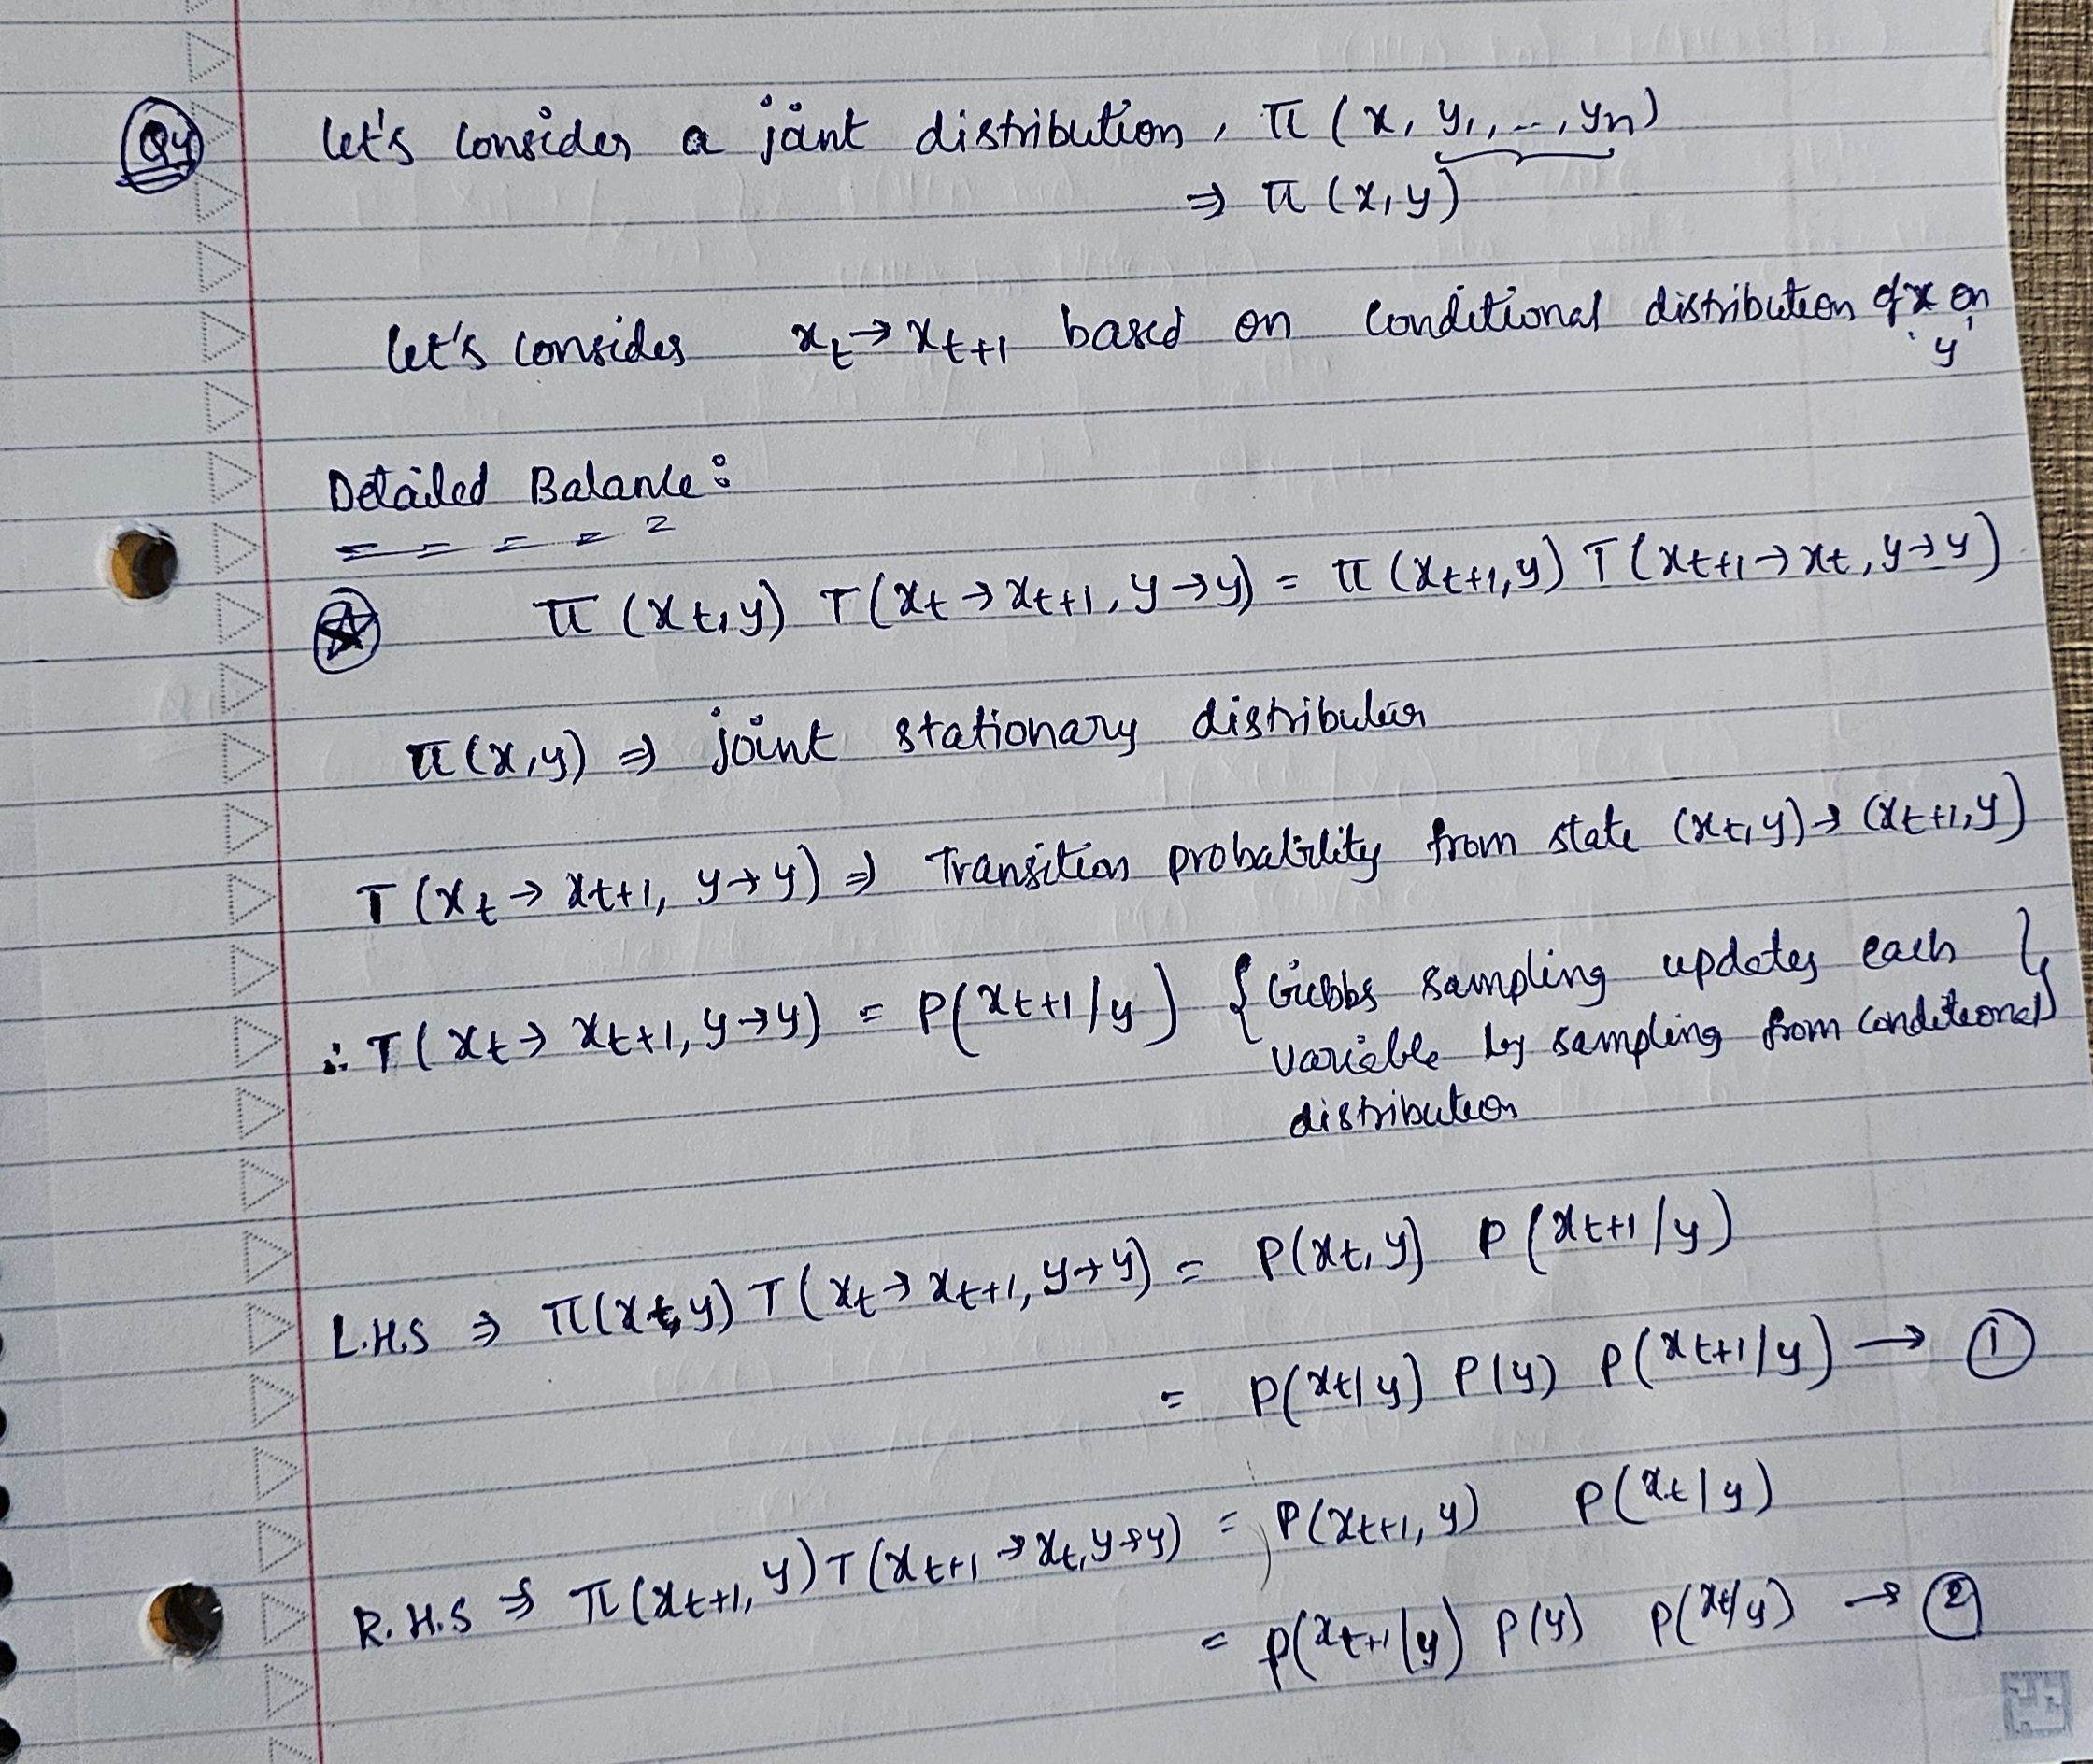
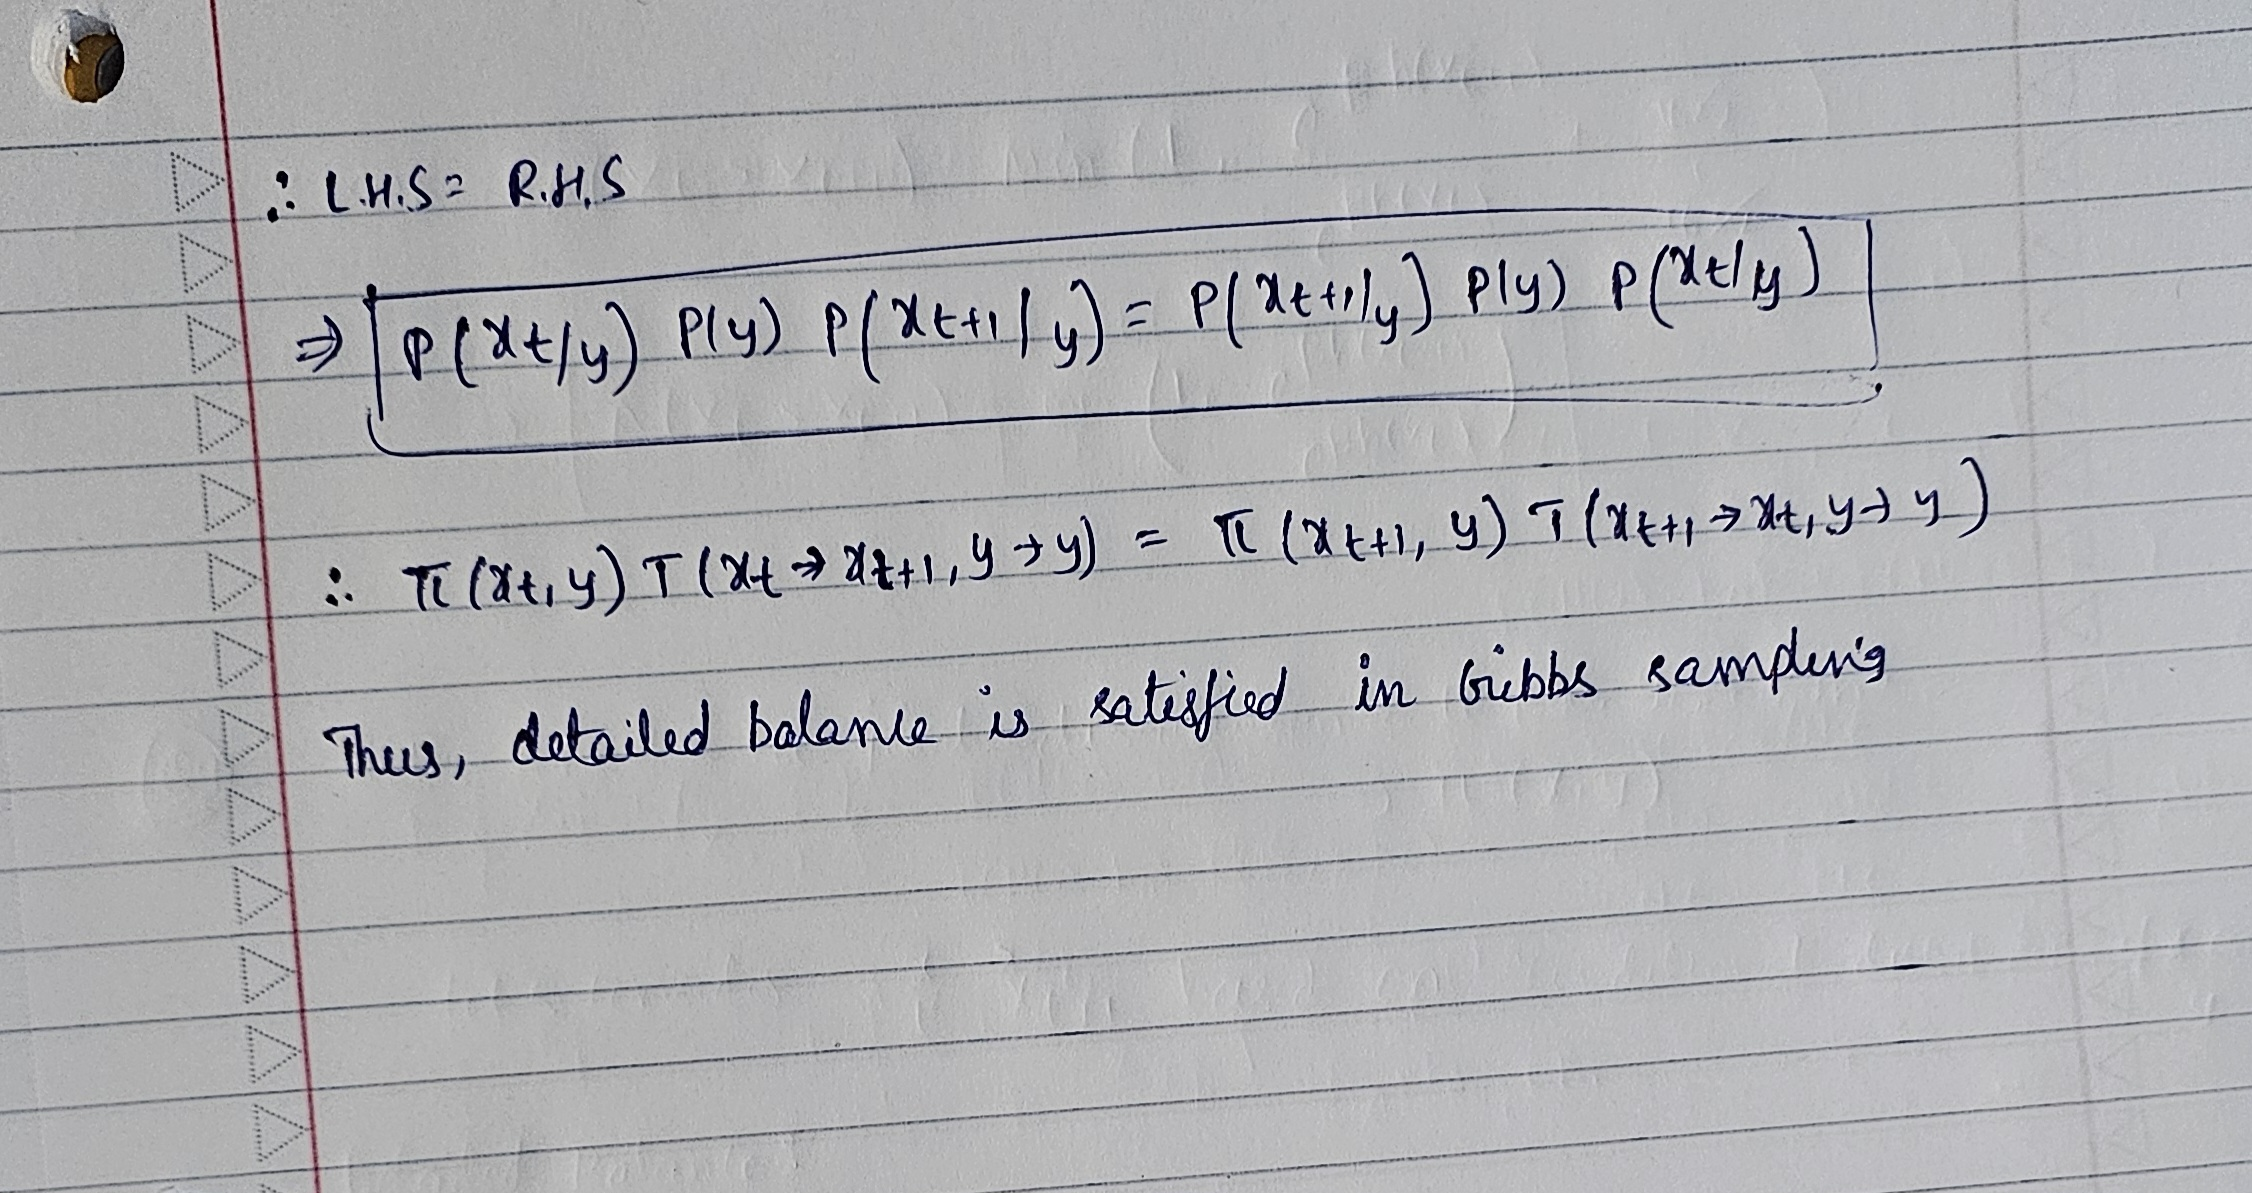

### Exercise 3


**Explain in Video**

Cosider a scenario where 16 people stand in a  4x4 grid $\textbf{X}$ and the Covid status of each person is recorded. One random instance of $\textbf{X}$ is shown below:
where the person in the $ith$ row and $jth$ column  is

$$
X_{i, j} =
\begin{cases}
0 & \text{ if they don't have Covid19}\\
1 & \text{ if they have Covid19}
\end{cases}
$$

and the configuration of the grid is determined by the probability model

$$
P\{X = x\} = \frac{e^{\beta h}}{NC},
$$

where $\beta>0$ is a constant; $NC$ is a normalizing constant that makes the total probability sum to 1; and $H(\textbf{X}) = h$ is the sum of number of neighbors each person has (up, down, left, right) that share the same health status. If a person is on an edge or corner, then they may not have some of these neighbors. In the example of
$\textbf{X}$ shown above, $h(\textbf{X}) = 24$ because

| $X_{i,j}$    | Number of same-status neighbors |
|-------------|---------------------------------|
| $X_{1,1}$   | 0                               |
| $X_{1,2}$   | 2                               |
| $X_{1,3}$   | 2                               |
| $X_{1,4}$   | 2                               |
| $X_{2,1}$   | 1                               |
| $X_{2,2}$   | 3                               |
| $X_{2,3}$   | 1                               |
| $X_{2,4}$   | 1                               |
| $X_{3,1}$   | 1                               |
| $X_{3,2}$   | 1                               |
| $X_{3,3}$   | 3                               |
| $X_{3,4}$   | 1                               |
| $X_{4,1}$   | 2                               |
| $X_{4,2}$   | 2                               |
| $X_{4,3}$   | 2                               |
| $X_{4,4}$   | 0                               |
| $sum$ | 24                              |

To be extra clear, we get the numbers in the table like so:  the person in the 2nd row and 3rd column is $X_{2,3}$ and has status 0. If we look above, below, left, and right (exclude diagonals) of this person, there is only one other person who shares the same Covid status of 0 ($X_{3,3}$). Therefore the number of same-status neighbors $X_{2,3}$ is 1. We tally up the same-status neighbors for each person in the grid and that value is  $h(\bf{X})$.

Now our goal is to estimate $P\{H(\textbf{X})\leq 11\}.$ You can probably tell that it is difficult to generate a bunch of 4x4 grids $\textbf{X}$ directly in order to then calculate what proportion of times $H({X})$ is less than 11. So we will use Gibbs sampling instead to swap between {0,1} status for each person $X_{i,j}$ in turn.


a) First, figure out what the conditional probability is for any $X_{i,j}$ to be 0 or 1 by finding the conditional probability of $P\{\textbf{X}=x|X_{-i,-j}\}$, where the given $X_{-i,-j}$ represents the fixed covid-statuses of everyone except the (i,j)th person, that is, the rest of the matrix is fixed besides $X_{i, j}$. Hint: $h$ can only take on two different values.


b) Create a deterministic Gibbs sampler using a burn-in of 1000 and $\beta=1/4$. For your results, try to estimate  $P\{\textbf{H(X)}\leq 11\};$  $P\{\textbf{H(X)}\leq 15\}$ ; and  $P\{\textbf{H(X)}\leq 20\}$ using 50 replications of your MCMC code. Report in one table the mean and se for each estimate over the 50 replications. (Thank you!)

**hint:** When I set the seed to 1, I get `0.030442` for my estimate of $P(H(X) \leq 20)$. Your value should be pretty close even if it isn't the same because you sampled a little differently.

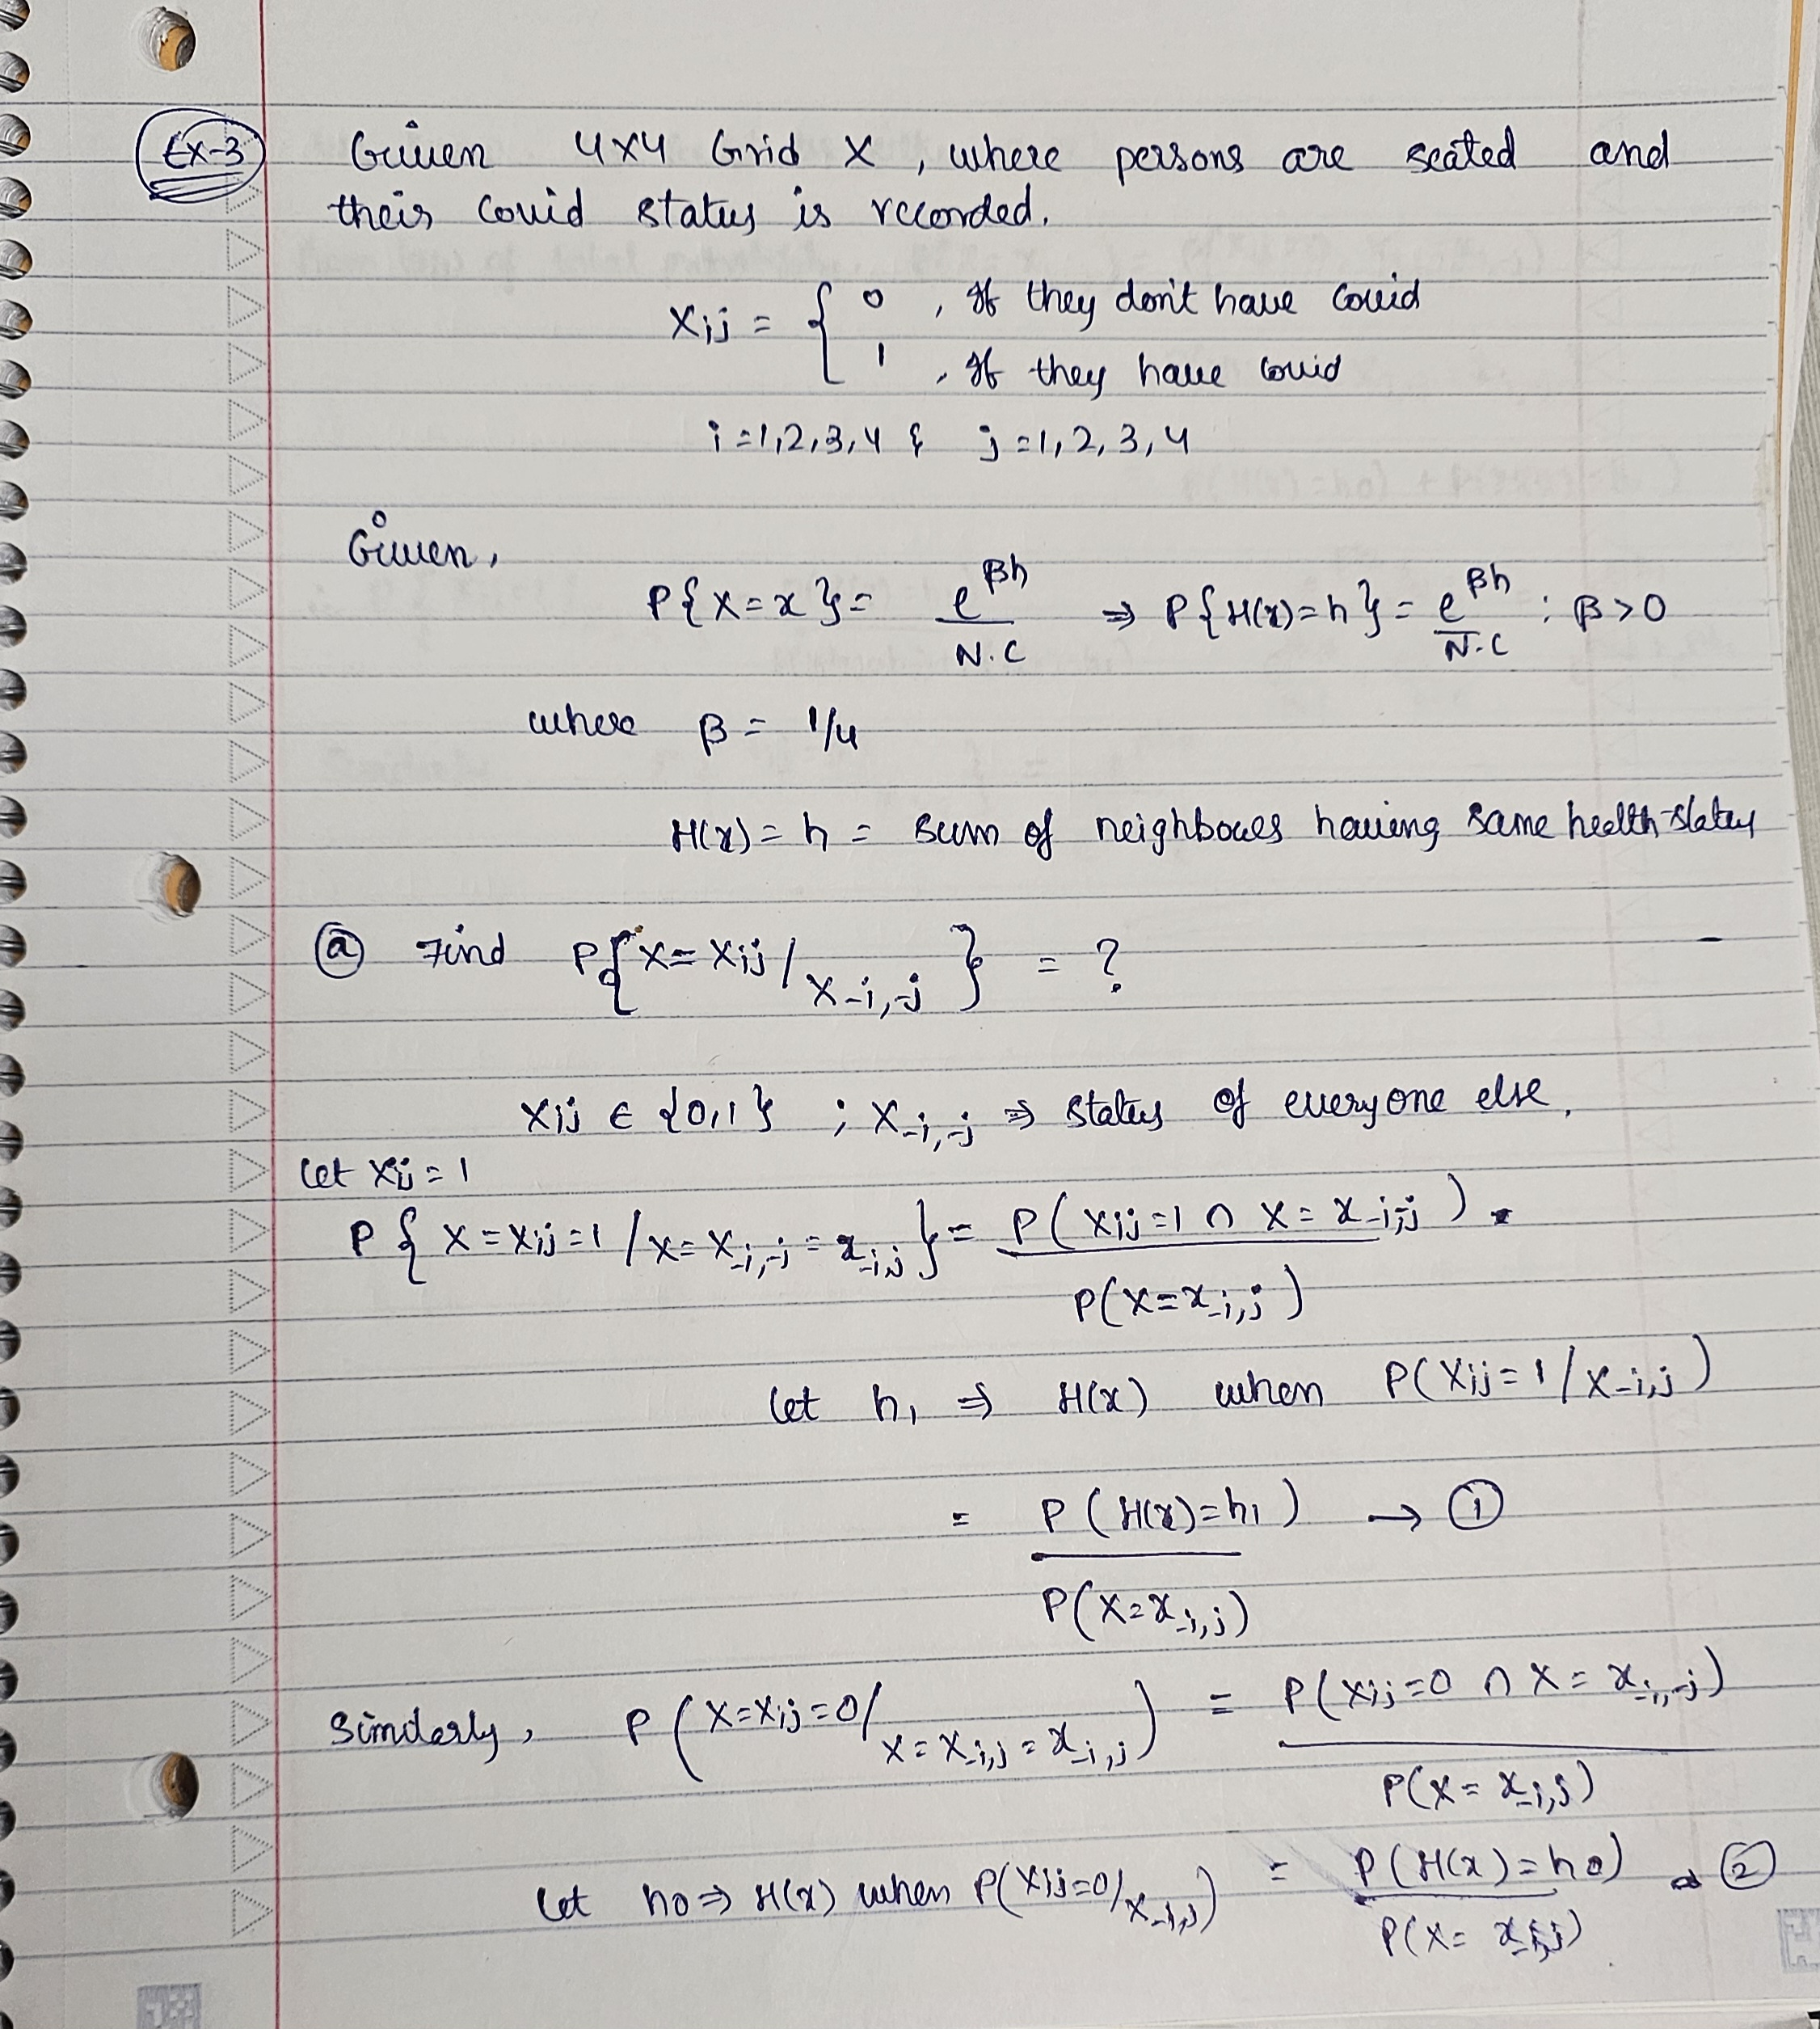
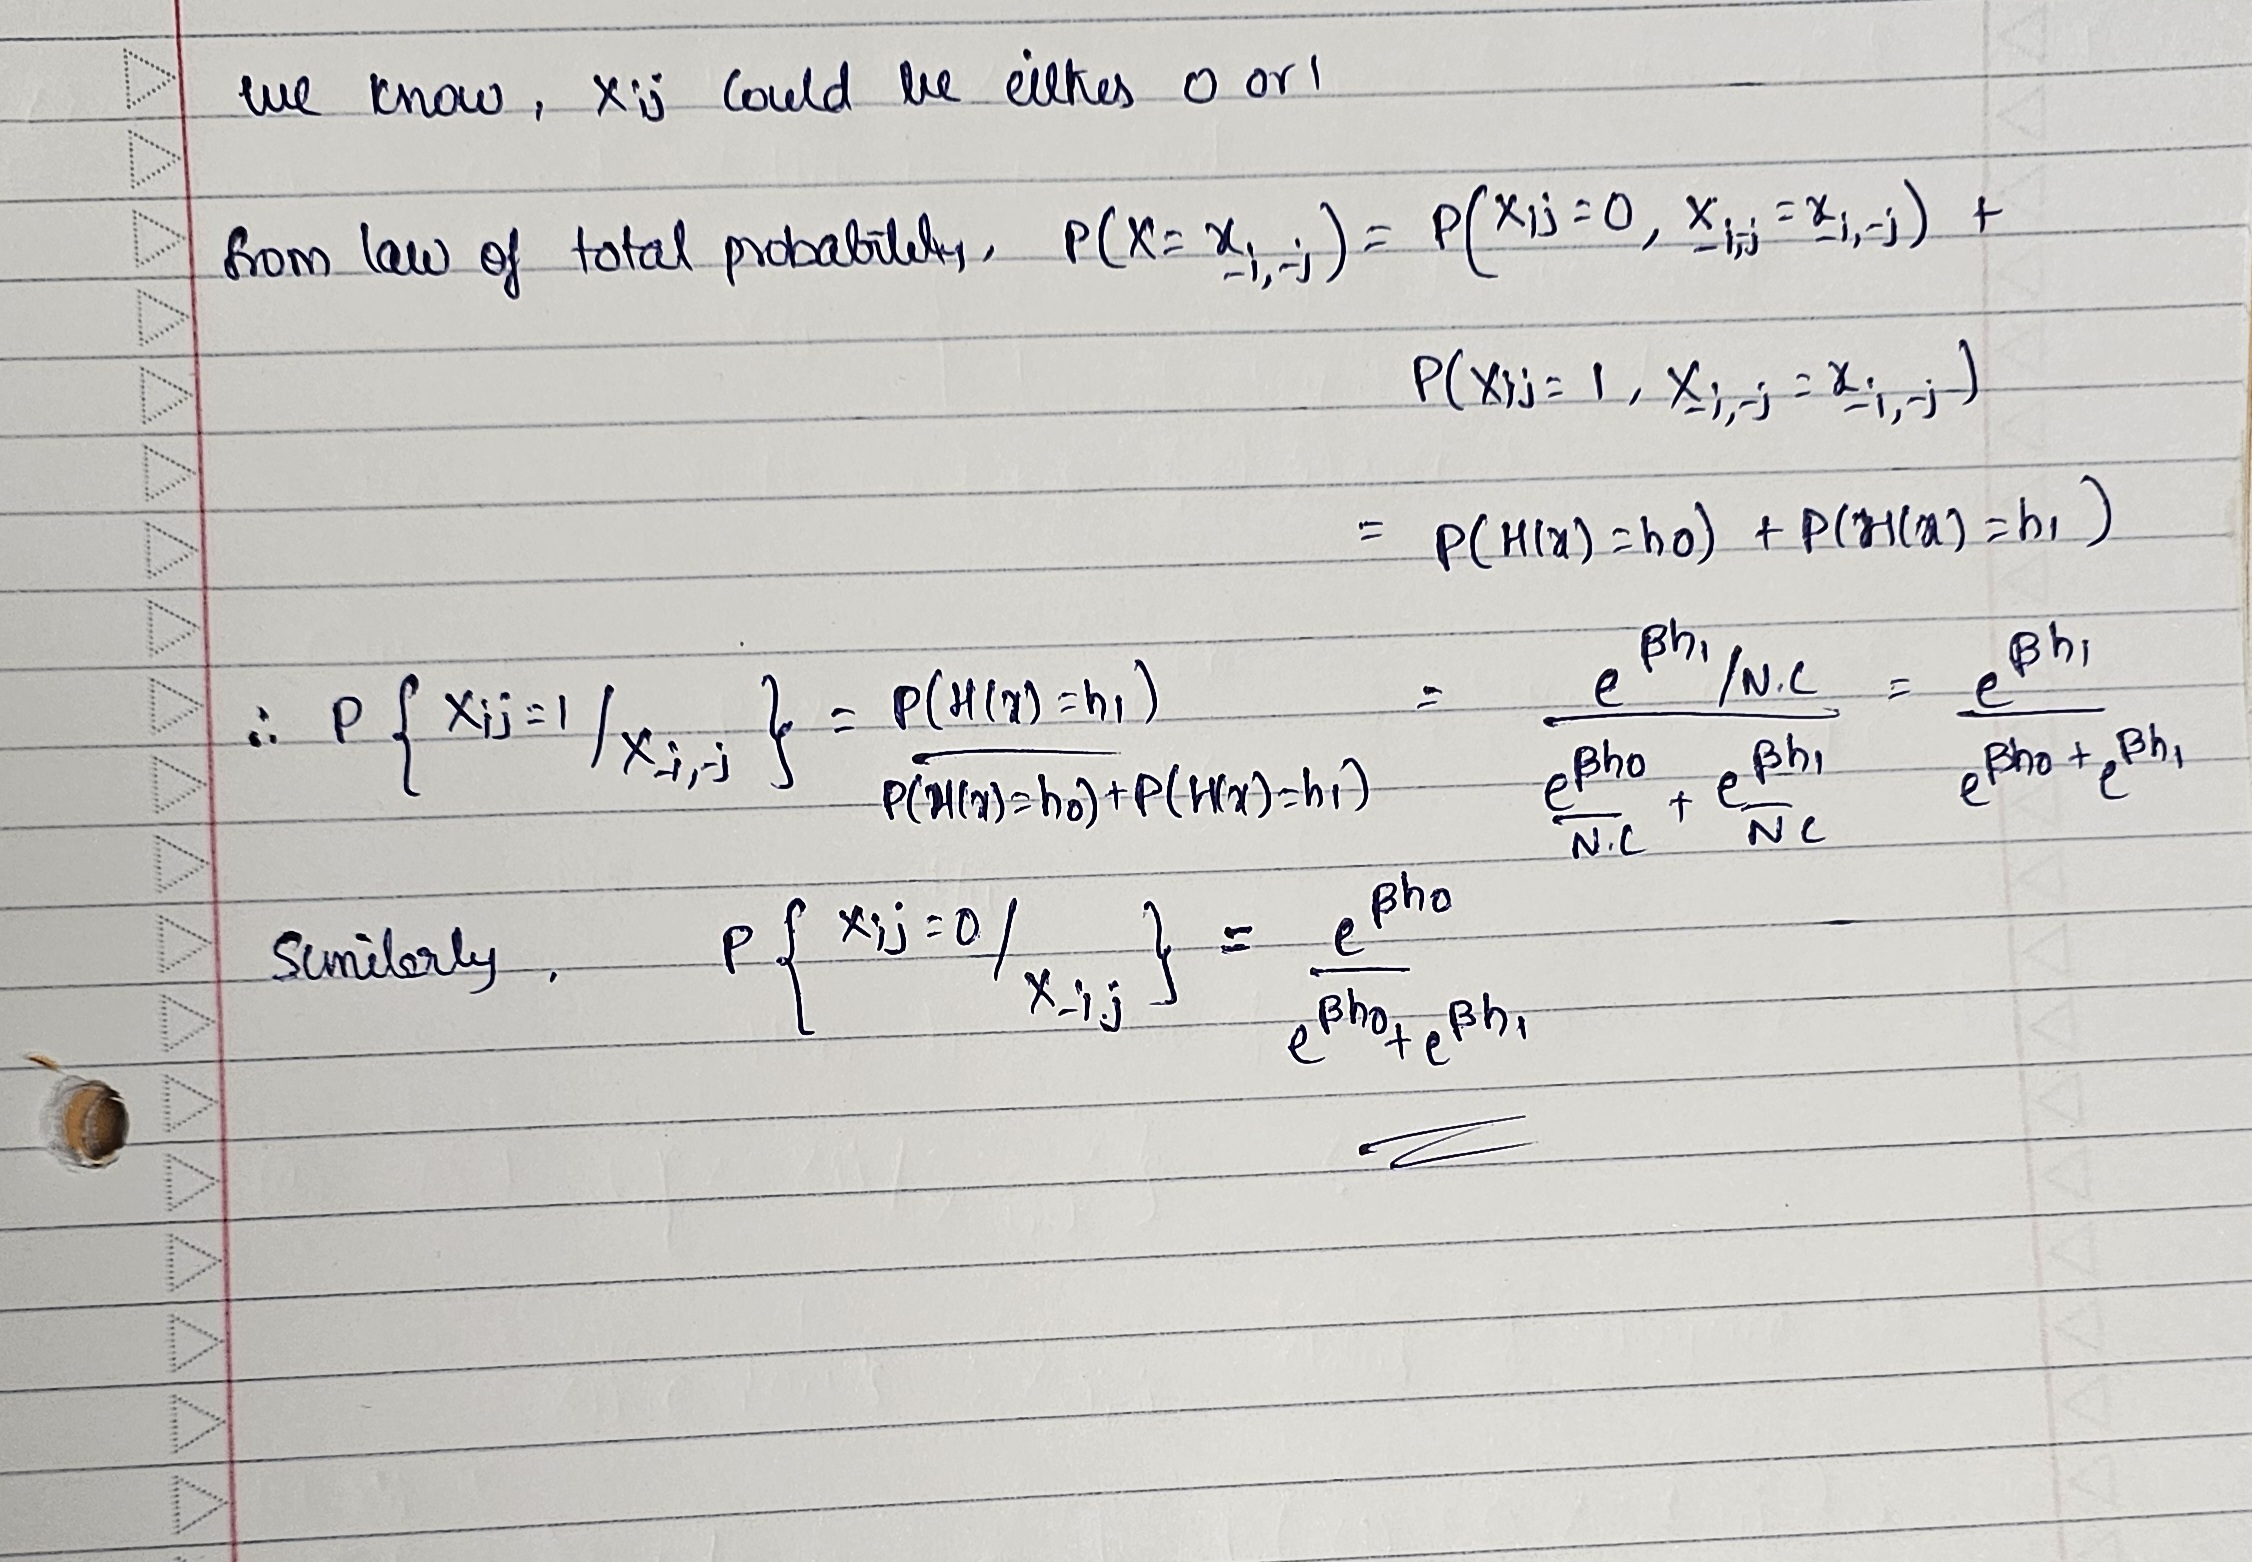

In [4]:
set.seed(1)

#function to calculate neighbours with same health status
h=function(matrix){
  maxRow=nrow(matrix)
  maxCol=ncol(matrix)
  n=0
  for(i in 1:maxRow){
    for(j in 1:maxCol){
      current_state=matrix[i,j]
      #Top Neighbour
      if(i>1){
        if(current_state==matrix[i-1,j]){
          n=n+1
        }
      }
      #Bottom Neighbour
      if(i<maxRow){
        if(current_state==matrix[i+1,j]){
          n=n+1
        }
      }
      #Left Neighbour
      if(j>1){
        if(current_state==matrix[i,j-1]){
          n=n+1
        }
      }
      #Right Neighbour
      if(j<maxCol){
        if(current_state==matrix[i,j+1]){
          n=n+1
        }
      }
    }
  }
  return(n)
}

gibbsStep = function(lastX){
  currentX = lastX
  for(i in 1:nrow(lastX)){
    for (j in 1:ncol(lastX)){
      #update Xi,j to 0
      currentX[i,j] = 0
      currentXAlt = currentX
      #define alt version Xi,j to 1
      currentXAlt[i,j]=1
      u = runif(1)
      #accept/reject alt version
      if(u > exp(beta*h(currentX))/(exp(beta*h(currentX))+exp(beta*h(currentXAlt)))){
        currentX = currentXAlt
      }
    }
  }
  return(currentX)
}


In [5]:
set.seed(1)

#Parameter settings
beta=1/4
burn_in=1000
runs=10*burn_in
replications=50
nrows=4
ncols=4

#results dataframe
results <- data.frame(
  Scenario = c("P(H(X) ≤ 11)", "P(H(X) ≤ 15)", "P(H(X) ≤ 20)"),
  Mean_Probability = NA,
  Standard_Error = NA
)

# Probabilities threshold
thresholds <- c(11, 15, 20)

# Iterate over probability thresholds
for (k in 1:length(thresholds)) {
  threshold <- thresholds[k]

  probs <- rep(NA,replications)

  for (rep in 1:replications) {
    # Define initial grid using Bernoulli trials
    xo <- matrix(rbinom(nrows * ncols, size = 1, 0.5), nrow = nrows)

    # Burn-in period
    for (b in 1:burn_in) {
      xo <- gibbsStep(xo)
    }

    # Runs
    h_samples=rep(NA,runs)
    for (r in 1:runs) {
      xo <- gibbsStep(xo)
      h_samples[r] <- h(xo)
    }
    #probability for the threshold
    probs[rep] <- mean(h_samples <= threshold)
  }

  # Save the mean probability for this threshold
  results$Mean_Probability[k] <- mean(probs)
  results$Standard_Error[k] <- sd(probs) 
}


print(results)

      Scenario Mean_Probability Standard_Error
1 P(H(X) ≤ 11)         0.000066   9.391703e-05
2 P(H(X) ≤ 15)         0.001000   2.203893e-04
3 P(H(X) ≤ 20)         0.029974   1.733677e-03


### Exercise 4


**Explain in Video**

We can actually use the MH sampler to carry out sampling in the 4x4 gride model. For this, use a proposal distribution that uniformly picks 1 amongst all the people on the grid and uniformly chooses a 0 or 1 health status for that person, that is

$$ g(X_{t+1}|X_{t}) = g(X_{t+1}) = \frac{1}{16*2}.
$$

a) Calculate the acceptance probability

b) Then estimate  $P\{H(\textbf{X})\leq 11\};$  $P\{H(\textbf{X})\leq 15\}$ ; and  $P\{H(\textbf{X})\leq 20\}$ using 50 replications of your MCMC code using the MH sampler. Report in one table the mean and se for each estimate over the 50 replications.

**hint:** When I set the seed to 1, I get `0.030986` for $P(H(X) \leq 20)$. Your value should be pretty close even if it isn't the same because you sampled a little differently.

### Remember please
to do your self-reflection (see rubric) where you assess which work you have done where you have a stronger understanding about and which you are less confident in.

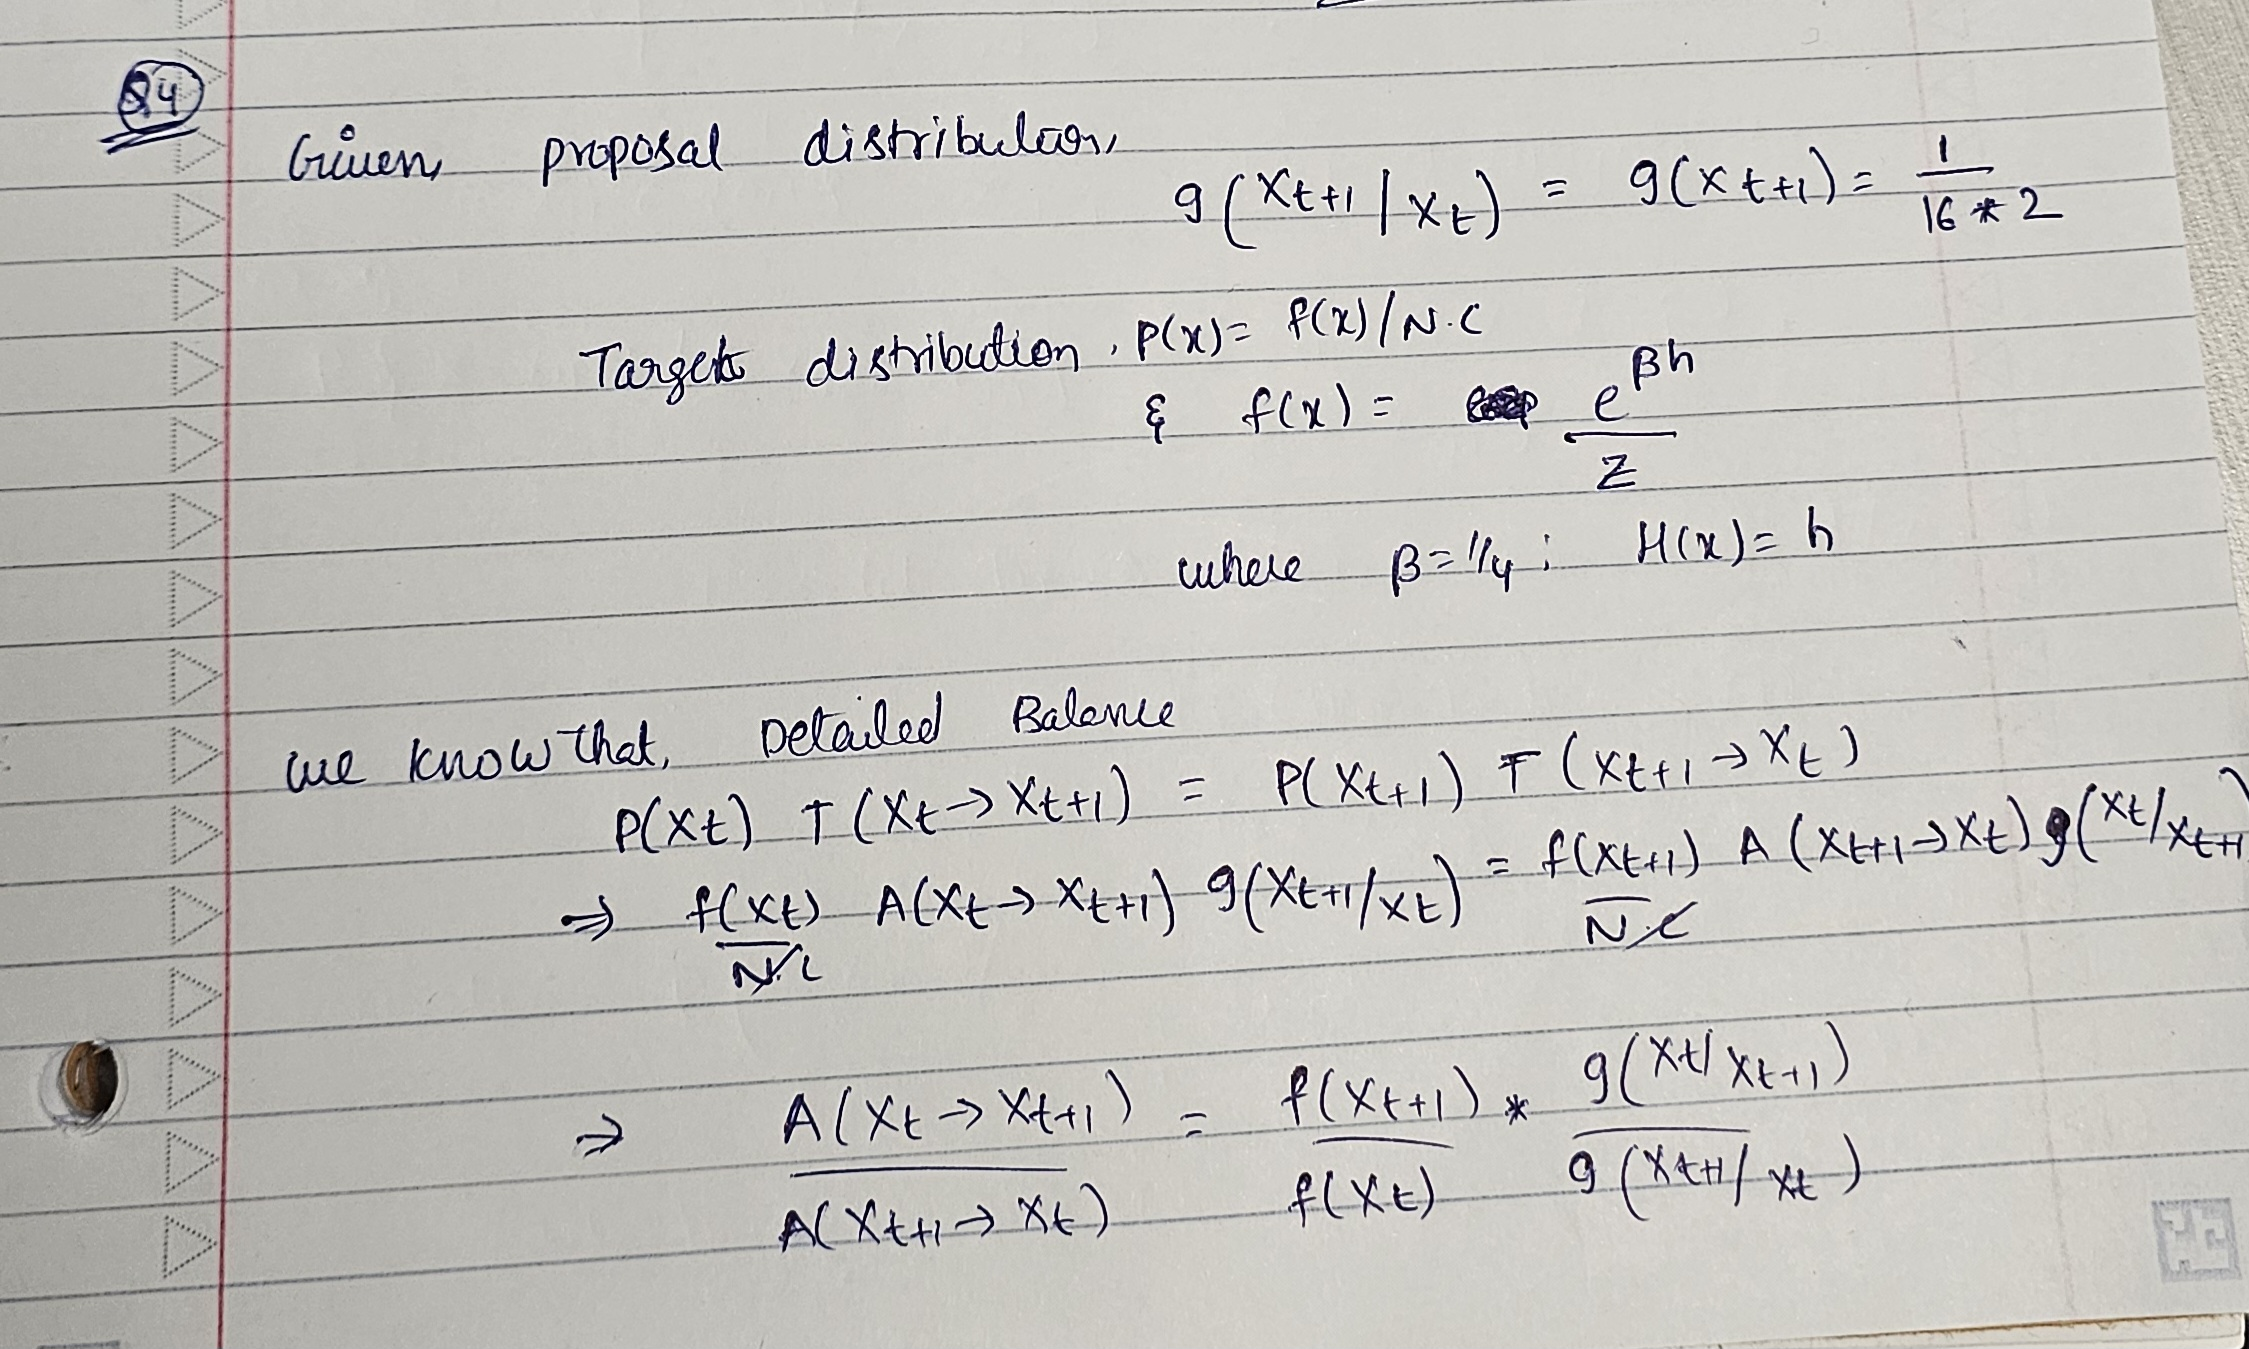
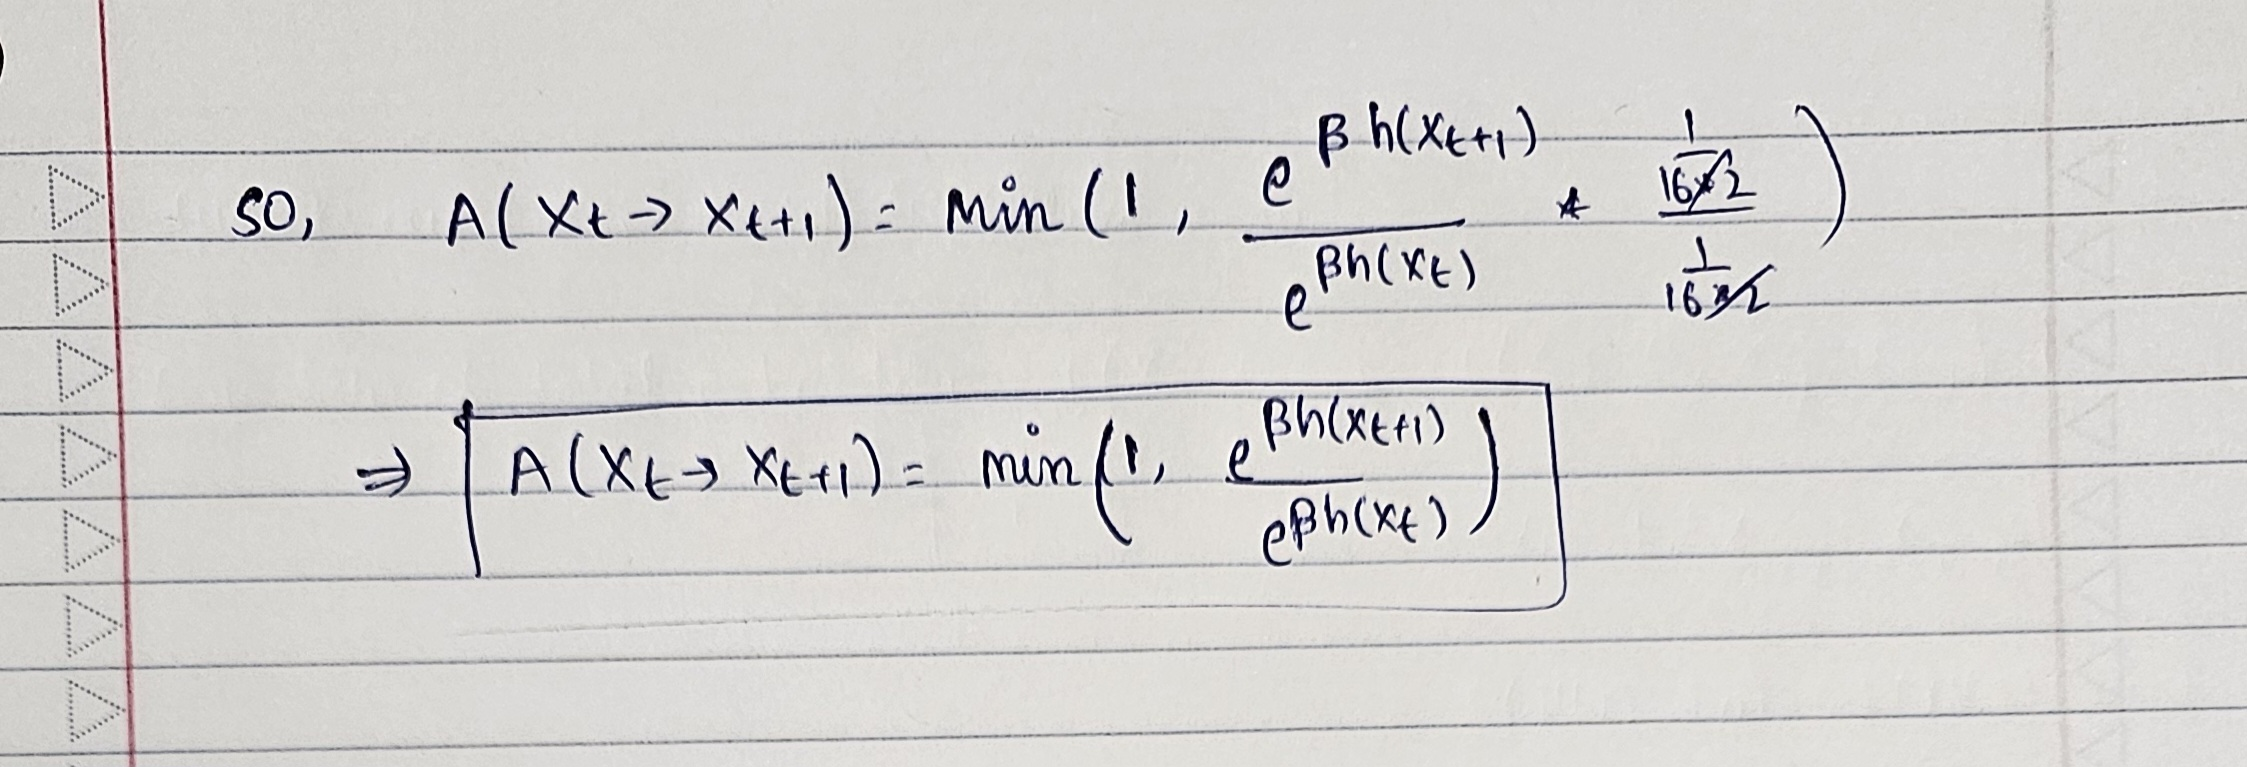

In [6]:
set.seed(1)

#function to calculate neighbours with same health status
h=function(matrix){
  maxRow=nrow(matrix)
  maxCol=ncol(matrix)
  n=0
  for(i in 1:maxRow){
    for(j in 1:maxCol){
      current_state=matrix[i,j]
      #Top Neighbour
      if(i>1){
        if(current_state==matrix[i-1,j]){
          n=n+1
        }
      }
      #Bottom Neighbour
      if(i<maxRow){
        if(current_state==matrix[i+1,j]){
          n=n+1
        }
      }
      #Left Neighbour
      if(j>1){
        if(current_state==matrix[i,j-1]){
          n=n+1
        }
      }
      #Right Neighbour
      if(j<maxCol){
        if(current_state==matrix[i,j+1]){
          n=n+1
        }
      }
    }
  }
  return(n)
}

mhStep <- function(currentX, beta) {
  # Randomly pick an element in the grid
  i <- sample(1:nrow(currentX), 1)
  j <- sample(1:ncol(currentX), 1)

  # Generate candidate by flipping the chosen element
  candidateX <- currentX
  candidateX[i, j] <- rbinom(1, size = 1, prob = 0.5 #choose candidate randomly

   # Only proceed if the candidate is different from the current value
  if (candidateX[i, j] != currentX[i, j]) {
    # Calculate acceptance probability
    h_current <- h(currentX)
    h_candidate <- h(candidateX)
    acceptance_prob <- min(1, exp(beta * h_candidate) / exp(beta * h_current))

    # Accept or reject the candidate
    if (runif(1) <= acceptance_prob) {
      return(candidateX)  # Accept the candidate
    }
  }
}


ERROR: Error in parse(text = x, srcfile = src): <text>:50:3: unexpected 'if'
49:    # Only proceed if the candidate is different from the current value
50:   if
      ^


In [ ]:
set.seed(1)
# Parameter settings
beta <- 1 / 4
burn_in=1000
runs=10*burn_in
replications <- 50
thresholds <- c(11, 15, 20)

# Results DataFrame
results <- data.frame(
  Scenario = c("P(H(X) ≤ 11)", "P(H(X) ≤ 15)", "P(H(X) ≤ 20)"),
  Mean_Probability = NA,
  Standard_Error = NA
)

# Probability thresholds
thresholds <- c(11, 15, 20)

# Iterate over probability thresholds
for (k in 1:length(thresholds)) {
  threshold <- thresholds[k]

  probs <- rep(NA, replications)

  for (rep in 1:replications) {
    # Define initial grid using Bernoulli trials
    xo <- matrix(rbinom(nrows * ncols, size = 1, 0.5), nrow = nrows)

    # Burn-in period
    for (b in 1:burn_in) {
      xo <- mhStep(xo, beta)
    }

    # Runs
    h_samples <- rep(NA, runs)
    for (r in 1:runs) {
      xo <- mhStep(xo, beta)
      h_samples[r] <- h(xo)
    }

    # Probability for the threshold
    probs[rep] <- mean(h_samples <= threshold)
  }

  # Save the mean probability and standard error for this threshold
  results$Mean_Probability[k] <- mean(probs)
  results$Standard_Error[k] <- sd(probs) 
}

print(results)

      Scenario Mean_Probability Standard_Error
1 P(H(X) ≤ 11)         0.000072   1.429714e-05
2 P(H(X) ≤ 15)         0.000966   6.908203e-05
3 P(H(X) ≤ 20)         0.030442   5.368015e-04
